In [68]:
import pandas as pd
import numpy as np
import os

def combine_data():
    # Directory containing participant CSV files
    data_dir = 'downsampled_data'

    # Initialize an empty list to store dataframes
    all_data = []

    # Loop through each participant's file
    for filename in os.listdir(data_dir):
        if filename.endswith('.csv'):
            # Load the CSV file
            participant_data = pd.read_csv("downsampled_data/"+filename)
            
            # Append to the list
            all_data.append(participant_data)

    # Combine all data into a single DataFrame
    combined_data = pd.concat(all_data, ignore_index=True)
    return combined_data


data = combine_data()
#drop rows where sleep stage is Missing
data = data[data['sleep_stage'] != 'Missing']
# Extract features and labels
# feature_columns = ['mag_mean', 'BVP_mean', 'TEMP_mean', 'EDA_mean', 'HR_mean', 'IBI_mean']
feature_columns = data.drop(columns=['participant_id', 'window_start_time', 'window_end_time', 'sleep_stage']).columns
print(feature_columns)
X = data[feature_columns]
y = data['sleep_stage']

Index(['BVP_mean', 'BVP_std', 'BVP_min', 'BVP_max', 'BVP_range', 'BVP_median',
       'SDNN', 'median_nni', 'IBI_mean', 'x_std', 'y_std', 'z_std', 'mag_mean',
       'mag_std', 'mag_max', 'movement_density', 'burst_count', 'EDA_mean',
       'EDA_std', 'EDA_trend', 'TEMP_mean', 'TEMP_std', 'TEMP_slope',
       'HR_mean', 'HR_std', 'HR_range', 'HR_trend'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler

# scaling since PCA is sensitive to scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [70]:
# Get the minimum number of samples across classes
class_counts = data['sleep_stage'].value_counts()
min_samples = class_counts.min()

participant_ids = data['participant_id']

np.random.seed(42)
# Sample equally from each class
sampled_indices = []
for cls in y.unique():
    cls_indices = np.where(y == cls)[0]
    sampled_cls = np.random.choice(cls_indices, min_samples, replace=False)
    sampled_indices.extend(sampled_cls)

X_balanced = X_scaled[sampled_indices]
y_balanced = y.iloc[sampled_indices]
participant_ids_balanced = participant_ids.iloc[sampled_indices]  # Critical!

In [71]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_balanced)

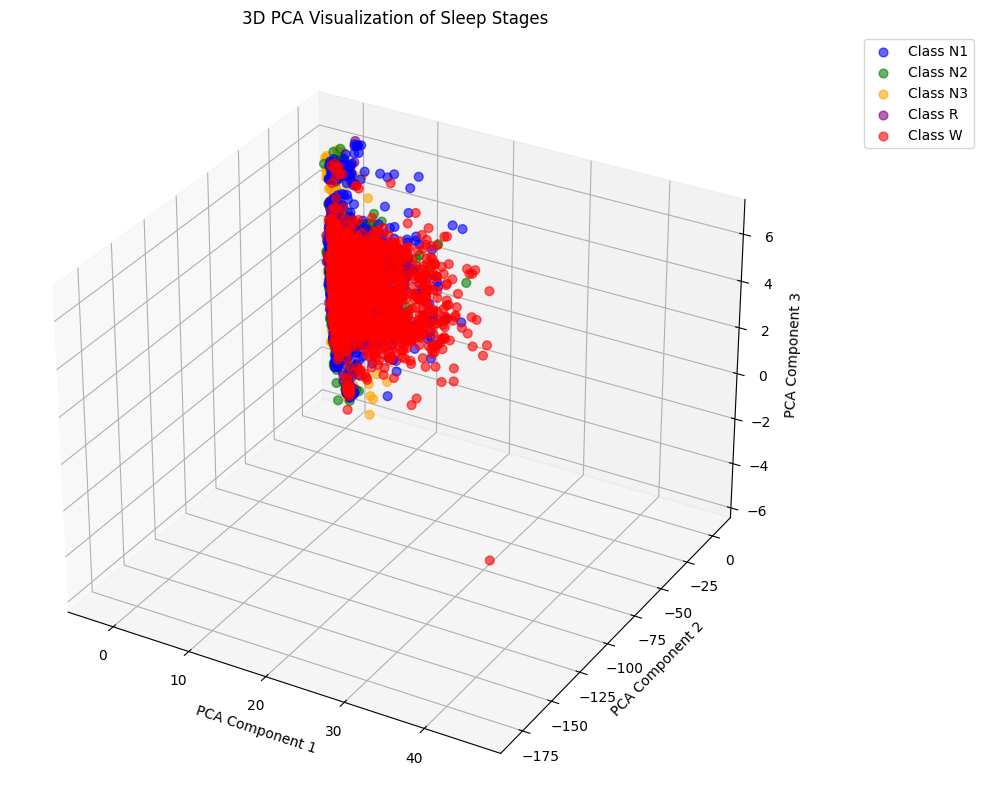

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Create a 3D plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Define colors for each sleep stage
colors = {
    'W': 'red',    # W
    'N1': 'blue',   # N1
    'N2': 'green',  # N2
    'N3': 'orange', # N3
    'R': 'purple'  # R
}

# Plot each class with labels
for sleep_stage in np.unique(y):
    mask = (y_balanced == sleep_stage)
    ax.scatter(
        X_pca[mask, 0],  # PC1
        X_pca[mask, 1],  # PC2
        X_pca[mask, 2],  # PC3
        c=colors[sleep_stage],
        label=f"Class {sleep_stage}",
        alpha=0.6,
        s=40  # Marker size
    )

# Add labels and legend
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('3D PCA Visualization of Sleep Stages')
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left')  # Adjust legend position
plt.show()

In [79]:
import plotly.express as px
fig = px.scatter_3d(
    x=X_pca[:, 0], y=X_pca[:, 1], z=X_pca[:, 2],
    color=y_balanced,
    labels={'color': 'Sleep Stage'},
    title='3D PCA Visualization'
)
fig.show()

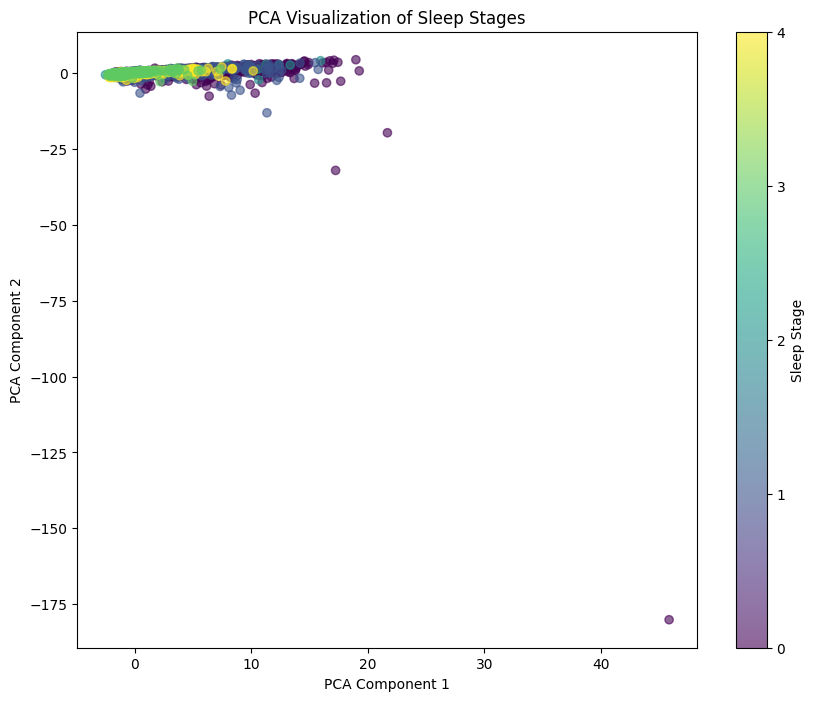

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=y_balanced.map({'W': 0, 'N1': 1, 'N2': 2, 'N3': 3, 'R': 4}),
    cmap='viridis',
    alpha=0.6
)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Sleep Stage', ticks=[0, 1, 2, 3, 4])
plt.title('PCA Visualization of Sleep Stages')
plt.show()